In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
%matplotlib inline

2023-11-06 09:52:16.268122: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 09:52:16.295518: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 09:52:16.296001: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 09:52:16.860709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from tensorflow import keras
from tensorflow.keras import models, layers, callbacks, activations, optimizers

In [4]:
from data_4_models import data_arrays, input_shape_check

In [5]:
x_train, y_train, x_valid, y_valid, x_test, y_test, alphabet = data_arrays(data_path= '/home/pgarcia/rbp_project/data/PTBP1_K562_200.h5')
print(x_train.shape, y_train.shape)

(11328, 200, 9) (11328, 1)


In [6]:
x_train, x_test, x_valid = input_shape_check(x_train, x_test,x_valid)

Input shape adjusted:
(11328, 200, 4)
(3237, 200, 4)
(1619, 200, 4)


In [7]:
# Make an empty list that will contain index of all positive occurences in y_test
idx_ytest=[]

#use enumerate function to get index of positive signals in y_test
for i, entry in enumerate(y_test):
    if entry == 1:
        idx_ytest.append(i)

# Make an array from the list that contains all positive signals from y_test 
idx_ytest_array = np.array(idx_ytest)

# Get a random number from array by using numpy.random.choice()
random_num = np.random.choice(idx_ytest_array)

print(random_num)

1463


# DeepBind Model

In [8]:
# load model
model = tf.keras.models.load_model('/home/pgarcia/rbp_project/models_deepbind3/deepbind + PTBP1_K562_200.h5')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 200, 16)           1552      
                                                                 
 activation_2 (Activation)   (None, 200, 16)           0         
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 8, 16)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                      

2023-11-06 09:52:25.229045: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


(1, 200, 4)
tf.Tensor(
[[[-1.28082618e-01  3.21055710e-01 -6.27413988e-02  4.96810824e-02]
  [ 1.93930909e-01 -1.80370100e-02 -4.01230417e-02 -2.64445748e-02]
  [-2.97689646e-01  2.70494878e-01  2.06561208e-01  1.26773164e-01]
  [-2.35342696e-01  1.05836965e-01  2.19336659e-01  3.15374434e-02]
  [ 1.34079039e-01  3.62475902e-01 -1.24632448e-01 -7.28118327e-03]
  [-1.62797794e-01  2.04492867e-01  5.66883534e-02 -6.89952746e-02]
  [ 1.39942259e-01  1.39738396e-01  1.16728231e-01 -7.44422302e-02]
  [-7.51821473e-02  3.01332653e-01 -2.24871933e-01  2.54018903e-01]
  [-7.26494342e-02  2.65430689e-01 -4.30538319e-02  2.97336094e-02]
  [-1.08681224e-01  1.68677926e-01  1.80725768e-01 -5.07510677e-02]
  [ 2.97147669e-02  8.26423541e-02  4.15635169e-01 -1.29974976e-01]
  [-4.57048975e-02  6.92737997e-02 -4.78568189e-02 -6.58027781e-03]
  [-1.24818407e-01  1.73041031e-01 -1.12827264e-01  2.68025875e-01]
  [ 1.57769442e-01  3.22982147e-02  4.83518131e-02  1.18080713e-01]
  [-1.74303055e-01  5.098

/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f5f615c1250>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f5f6160ee80>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

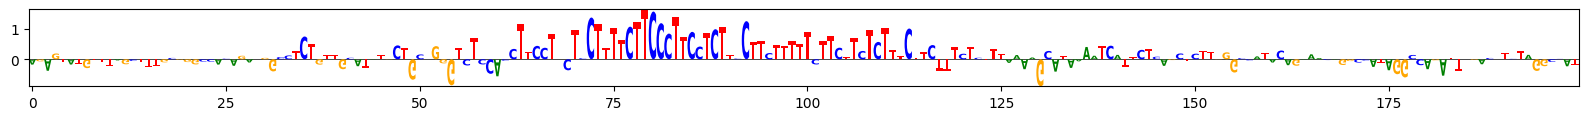

In [9]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

# Extract a sequence from x_test
X = x_test[2178:2179]
print(X.shape)

#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
print(saliency_map)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  #
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)
  
  # Save the saliency plot with the sequence index in the filename
  fig.savefig(f"PTBP1_sal_map_seq2178_deepbind.svg", dpi=300)

# DeepBind_exp Model

In [39]:
# load model
model = tf.keras.models.load_model('/home/pgarcia/rbp_project/models_deepbind3/deepbind_exp + PTBP1_K562_200.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 200, 16)           1552      
                                                                 
 activation (Activation)     (None, 200, 16)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 16)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

(1, 200, 4)
tf.Tensor(
[[[ 2.84181386e-02  1.73308015e-01 -1.09574094e-01  1.35383874e-01]
  [ 5.30573130e-02  8.36199299e-02 -2.28847578e-01  2.29231670e-01]
  [-1.58891261e-01  2.02587128e-01 -2.96336740e-01  2.11081326e-01]
  [ 4.53157313e-02  3.96047860e-01  1.03567049e-01 -1.53794527e-01]
  [-5.41514792e-02  1.75495803e-01 -1.74672127e-01  5.84424846e-02]
  [-1.51464120e-01  1.77875757e-01 -1.11731719e-02 -1.16621032e-01]
  [-1.96766868e-01  7.98224732e-02 -1.03113733e-01  1.01813022e-02]
  [-8.35720003e-02  2.50442982e-01 -2.93600380e-01  5.94239794e-02]
  [-3.97786275e-02  6.80281818e-02  3.43018919e-02  8.26854073e-03]
  [-1.68984666e-01  2.03704774e-01  5.76817282e-02 -4.93814945e-02]
  [ 5.80165535e-02  1.13411285e-01 -1.15049854e-01  9.39835049e-03]
  [-2.76275016e-02  2.47260526e-01 -3.29549401e-03 -1.59948274e-01]
  [-2.05735400e-01  3.09056699e-01 -2.04176918e-01  7.26104304e-02]
  [-8.08091313e-02  1.84396848e-01 -8.05171654e-02  4.75033410e-02]
  [-7.65052587e-02  1.122

/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f72f830bac0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f72f830baf0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

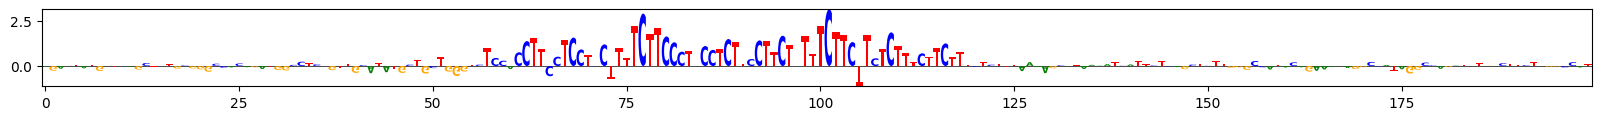

In [40]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

# Extract a sequence from x_test
X = x_test[2178:2179]
print(X.shape)

#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
print(saliency_map)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)
  
  # Save the saliency plot with the sequence index in the filename
  fig.savefig(f" PTBP1_sal_map_seq2178_deepbind_exp.svg", dpi=300)

# Baseline CNN Model

In [41]:
# load model
model = tf.keras.models.load_model('/home/pgarcia/rbp_project/models_deepbind3/baseline_cnn + PTBP1_K562_200.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 200, 30)           2310      
                                                                 
 activation (Activation)     (None, 200, 30)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 100, 30)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 30)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 30)           17130     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 30)             0         
 g1D)                                                   

(1, 200, 4)
tf.Tensor(
[[[-4.65764642e-01  8.76757801e-02  3.42550009e-01 -5.42682648e-01]
  [ 2.79960662e-01 -8.16646665e-02  3.17653596e-01 -6.14279330e-01]
  [-4.60842222e-01  2.59251148e-03  4.34518516e-01 -3.35716486e-01]
  [-6.54511750e-01 -3.23339403e-02  4.31383967e-01  5.32771461e-02]
  [-9.41557735e-02  3.82205188e-01  2.28849128e-01 -1.37951016e-01]
  [-2.49270648e-01  6.90996587e-01  1.02929980e-01 -3.57938826e-01]
  [ 4.24212784e-01  5.55417359e-01 -1.60022572e-01 -4.45888132e-01]
  [-5.96886873e-01  7.75412321e-01  1.03160286e+00 -5.84977746e-01]
  [ 2.45207027e-01 -4.63929951e-01  4.72030610e-01 -2.97072589e-01]
  [-1.56684309e-01 -4.35856402e-01  3.28445613e-01  6.60575032e-02]
  [-3.82125825e-01 -3.78552735e-01  7.52354741e-01 -6.92861795e-01]
  [-1.00091755e+00  1.22837317e+00 -1.62638620e-01  8.48119855e-01]
  [-1.33706510e+00  6.14038348e-01 -5.27200580e-01  1.25090337e+00]
  [ 1.04227567e+00  5.40510952e-01  3.68663400e-01 -7.42865384e-01]
  [-1.09503281e+00  9.192

/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f72f846ea90>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f72697d3520>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

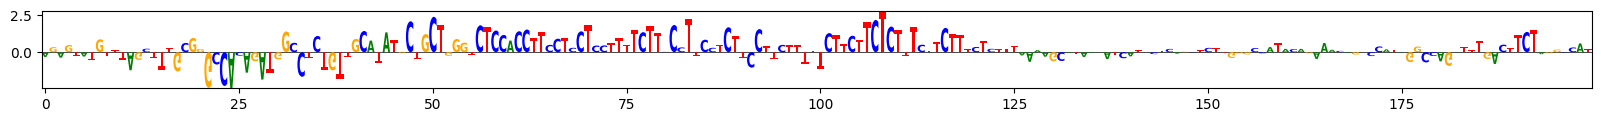

In [42]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

# Extract a sequence from x_test
X = x_test[2178:2179]
print(X.shape)

#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
print(saliency_map)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)
  
  # Save the saliency plot with the sequence index in the filename
  fig.savefig(f" PTBP1_sal_map_seq2178_baseline_cnn.svg", dpi=300)

# Baseline_CNN_exp Model

In [43]:
# load model
model = tf.keras.models.load_model('/home/pgarcia/rbp_project/models_deepbind3/baseline_cnn_exp + PTBP1_K562_200.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 200, 30)           2310      
                                                                 
 activation (Activation)     (None, 200, 30)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 100, 30)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 30)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 30)           17130     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 2, 30)             0         
 g1D)                                                   

(1, 200, 4)
tf.Tensor(
[[[-1.49944127e-01  1.22659817e-01 -6.65313080e-02  4.62169498e-02]
  [-2.20791288e-02  1.29018828e-01 -7.08145499e-02  3.29101048e-02]
  [-1.10450551e-01  1.82873651e-01 -4.52325493e-02 -5.85630490e-03]
  [-3.26259285e-02  2.29348212e-01 -9.25759152e-02 -1.01439580e-02]
  [-1.64159574e-03  2.34049931e-01 -4.24456932e-02 -6.69334903e-02]
  [-6.89335689e-02  2.55355358e-01 -6.51352406e-02 -4.14716080e-02]
  [-1.78450719e-03  2.54723370e-01 -1.08756840e-01 -3.38898003e-02]
  [-5.11127338e-02  2.92565495e-01 -1.13911673e-01 -6.44844100e-02]
  [-7.30055273e-02  2.80767798e-01 -1.08686410e-01 -3.61786932e-02]
  [-9.64323804e-02  2.79169381e-01 -1.34189621e-01 -3.25975306e-02]
  [-1.73338264e-01  2.37071902e-01 -2.78108697e-02  3.94152999e-02]
  [-1.82794467e-01  2.41440088e-01 -2.99588405e-02  5.53067252e-02]
  [-1.95193574e-01  2.48502374e-01 -1.15028724e-01  9.83573347e-02]
  [-1.34985358e-01  2.32635364e-01 -2.84626894e-02 -6.79819472e-03]
  [-2.40135029e-01  2.164

/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f72f8190400>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f72f8190220>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

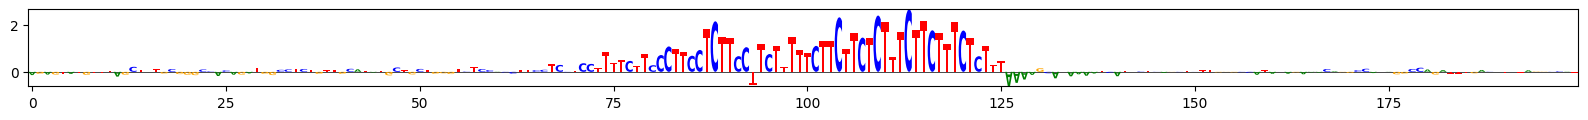

In [44]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

# Extract a sequence from x_test
X = x_test[2178:2179]
print(X.shape)

#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
print(saliency_map)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)
  
  # Save the saliency plot with the sequence index in the filename
  fig.savefig(f" PTBP1_sal_map_seq2178_baseline_cnn_exp.svg", dpi=300)